### Data Wrangling

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

C:\Users\HP\AppData\Local\Temp\ipykernel_18948\2587900687.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18948\2587900687.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

array([ 48., 128., 208., 288.])

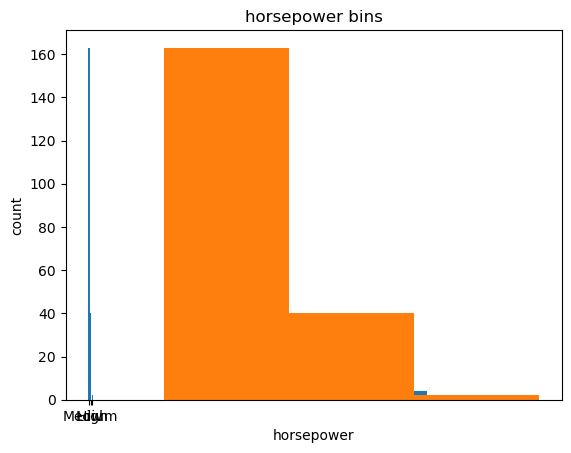

In [19]:
import pandas as pd
import requests 
import numpy as np
import matplotlib.pylab as plt
def download (url,filename):
    response=requests.get(url)
    if response.status_code==200:
        with open(filename,"wb") as f:
            f.write(response.content)
        return True
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
download (file_path,"used_cars.csv")
file_name="used_cars.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(file_name,names=headers)
df.columns=headers
df.replace("?",np.nan,inplace=True)
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#convert data types
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float")
df[["normalized-losses"]]=df[["normalized-losses"]].astype("float")
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")
df.dtypes
#converting data
df['city-L/100km']=235/df["city-mpg"]

#data normalization replace(original value) by original value/max value
df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()
# binning
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

df["horsepower"]=df["horsepower"].astype(int,copy=True)
#plot the graph
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins
#plot distribution of each bin
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
plt.pyplot.hist(df["horsepower"], bins = 3)
bins